In [343]:
import pandas as pd

In [344]:
df = pd.read_csv('train.csv')

In [345]:
df.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل


In [346]:
from math import dist
get_distance = lambda row: dist((0,0),(row.x,row.y))

df['distance'] = df.apply(get_distance , axis=1)

# prediction


- Here we change "گل" string which shows if player scored a goal by his/her shoot, to 0 or 1 . 1 for goal and 0 for No-goal

In [347]:
GOAL = 'گُل'

df['target'] = 0
df.loc[df.outcome == GOAL,'target'] = 1

In [348]:
df

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,distance,target
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل,17.530810,1
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان,17.090313,0
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان,29.456534,0
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته,26.948560,0
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل,11.932141,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8920,m_57,p_115,جریان بازی,سر,6.48,3.99,3,0,زیاد,69,50,موقعیت از دست رفته,7.609895,0
8921,m_59,p_76,جریان بازی,پای راست,21.45,-8.73,4,1,متوسط,15,53,برخورد به دفاع,23.158484,0
8922,m_55,p_150,جریان بازی,پای چپ,11.97,3.24,3,0,متوسط,84,34,موقعیت از دست رفته,12.400746,0
8923,m_33,p_130,جریان بازی,پای راست,6.48,-6.98,1,0,زیاد,4,39,موقعیت از دست رفته,9.524222,0


- now lets check our data frame columns

In [349]:
df.columns

Index(['matchId', 'playerId', 'playType', 'bodyPart', 'x', 'y',
       'interveningOpponents', 'interveningTeammates', 'interferenceOnShooter',
       'minute', 'second', 'outcome', 'distance', 'target'],
      dtype='object')

In [350]:
get_datails = lambda x: df.groupby(x).mean()['target']
get_datails('playType')


playType
جریان بازی          0.113273
ضربه آزاد مستقیم    0.079137
مستقیم از کرنر      0.500000
پنالتی              0.769841
Name: target, dtype: float64

- here we see that the type of playType can be effective on the scoring goal. so we had its categories to our columns

In [351]:

tmp = pd.get_dummies(df.playType)
df1 = pd.merge(df,tmp,left_index= True,right_index= True)
df1.head()

,matchId,playerId,playType,bodyPart,x,y,interveningOpponents,interveningTeammates,interferenceOnShooter,minute,second,outcome,distance,target,جریان بازی,ضربه آزاد مستقیم,مستقیم از کرنر,پنالتی
0,m_91,p_103,جریان بازی,پای راست,13.47,-11.22,1,0,متوسط,70,9,گُل,17.530810,1,1,0,0,0
1,m_17,p_16,جریان بازی,پای چپ,9.48,14.22,3,0,متوسط,55,4,مهار توسط دروازه بان,17.090313,0,1,0,0,0
2,m_111,p_88,ضربه آزاد مستقیم,پای چپ,29.43,-1.25,6,2,کم,86,31,مهار توسط دروازه بان,29.456534,0,0,1,0,0
3,m_142,p_87,جریان بازی,پای راست,26.93,1.00,4,1,متوسط,77,2,موقعیت از دست رفته,26.948560,0,1,0,0,0
4,m_117,p_9,جریان بازی,پای راست,10.72,5.24,2,0,متوسط,76,46,گُل,11.932141,1,1,0,0,0


In [352]:
get_datails('bodyPart')

bodyPart
سایر        0.237288
سر          0.119472
پای راست    0.116524
پای چپ      0.126683
Name: target, dtype: float64

- again we need to do same operation on bodyPart's categories

In [353]:
other = 'سایر'
df['bodyPart_1'] = 0
df.loc[df.bodyPart == other,'bodyPart_1'] =  1

- now lets check other columns and their plots

<AxesSubplot:xlabel='interveningOpponents'>

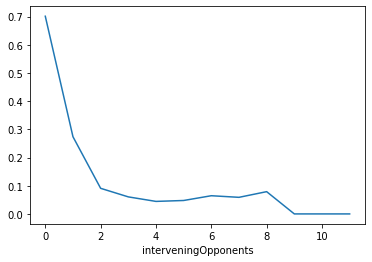

In [354]:
get_datails('interveningOpponents').plot()

<AxesSubplot:xlabel='interveningTeammates'>

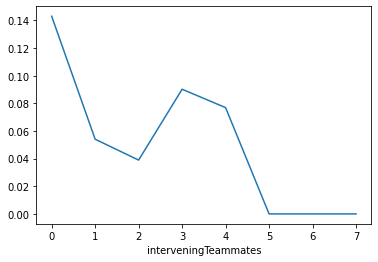

In [355]:
get_datails('interveningTeammates').plot()

<AxesSubplot:xlabel='interferenceOnShooter'>

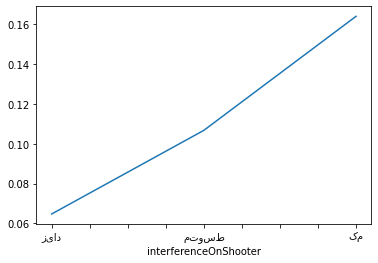

In [356]:
get_datails('interferenceOnShooter').plot()

In [357]:
get_datails('minute').sort_values()

minute
98    0.000000
77    0.052632
71    0.060976
95    0.066667
50    0.073770
        ...   
37    0.175258
73    0.177083
96    0.250000
27    0.276316
97    0.500000
Name: target, Length: 99, dtype: float64

<AxesSubplot:xlabel='minute'>

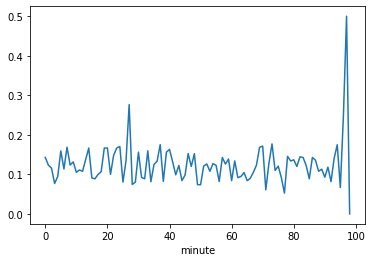

In [358]:
get_datails('minute').plot()

 - if check the plot above we can figure out that minutes can not be functional for our prediction
 - in main_columns we collect all factors that can be effective on our prediction

In [359]:
main_columns = ['interveningOpponents','distance','distance','interveningTeammates','ضربه آزاد مستقیم', 'مستقیم از کرنر','پنالتی', 'زیاد', 'متوسط', 'کم','جریان بازی']

- now we add 'interferenceOnShooter' parameters to our data frame comulmns

In [360]:
tmp = pd.get_dummies(df1.interferenceOnShooter)
df1 = df1.merge(tmp,left_index=True,right_index=True)

In [361]:
df1.columns

Index(['matchId', 'playerId', 'playType', 'bodyPart', 'x', 'y',
       'interveningOpponents', 'interveningTeammates', 'interferenceOnShooter',
       'minute', 'second', 'outcome', 'distance', 'target', 'جریان بازی',
       'ضربه آزاد مستقیم', 'مستقیم از کرنر', 'پنالتی', 'زیاد', 'متوسط', 'کم'],
      dtype='object')

- in the last step we add result of each shoot and our factors to two variable 

In [381]:
x = df1[main_columns]
y = df['target']

- let's create our models

In [382]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

models = {
    "SGD" : SGDClassifier(),
    'SGD_log' : SGDClassifier(loss= 'log'),
    'SVC' : SVC(),
    'RandomForest': RandomForestClassifier()
}

In [383]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [384]:
def test_model (model): 
    model.fit(x_train,y_train)
    y_predict = model.predict(x_test)
    return accuracy_score(y_predict,y_test)

In [385]:
for model_name, model in models.items():
    ac = test_model(model)
    print(f'{model_name}: {ac:.2f}')

SGD: 0.89
SGD_log: 0.88
SVC: 0.88
RandomForest: 0.85


In [386]:
test = pd.read_csv('test.csv')

- we create a function that convert all input data to a standard data that to feed our models

In [387]:
def convert_data(df):
    df = df.copy()
    get_distance = lambda row: dist((0,0),(row.x,row.y))
    other = 'سایر'
    df['bodyPart_1'] = 0
    df.loc[df.bodyPart == other,'bodyPart_1'] =  1
    
    tmp = pd.get_dummies(df.interferenceOnShooter)
    df = df.merge(tmp,left_index=True,right_index=True)
    
    tmp = pd.get_dummies(df.playType)
    df = pd.merge(df,tmp,left_index= True,right_index= True)
    
    
    df['distance'] = df.apply(get_distance , axis=1)
    main_columns = ['interveningOpponents','distance','interveningTeammates','bodyPart_1','ضربه آزاد مستقیم', 'مستقیم از کرنر','پنالتی', 'زیاد', 'متوسط', 'کم','جریان بازی']
    
    return df[main_columns]



In [388]:
convert_data(test)

,interveningOpponents,distance,interveningTeammates,bodyPart_1,ضربه آزاد مستقیم,مستقیم از کرنر,پنالتی,زیاد,متوسط,کم,جریان بازی
0,1,8.880343,0,0,0,0,0,0,0,1,1
1,2,27.448222,1,0,0,0,0,0,0,1,1
2,4,13.507069,0,0,0,0,0,0,1,0,1
3,1,13.053191,0,0,0,0,0,1,0,0,1
4,2,13.668533,1,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,14.414361,0,0,0,0,0,0,0,1,1
1996,2,14.064096,0,0,0,0,0,0,0,1,1
1997,2,11.537911,0,0,0,0,0,0,1,0,1
1998,4,23.596326,0,0,0,0,0,0,1,0,1


- now let's check howmany shoots wil be scored as a goal

In [389]:
df_test = convert_data(test)
model.predict(df_test).sum()

1313